In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA/Data/Titanic/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.corr()

<ipython-input-271-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [ ]:
data_test.insert(loc=0, column='Survived', value=data_gender['Survived'].values)



In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


In [ ]:
data_test.shape

(418, 7)

In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
np.random.seed(0)

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [ ]:

data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
X = data_train.drop(['Age'], axis=1).values
Y = data_train['Age'].values

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]   #survived
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [ ]:
#X_test = data_test.values
#Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
#from sklearn.metrics import accuracy_score

#accuracy_score(Y_test, Y_pred)

In [ ]:
###from sklearn.metrics import balanced_accuracy_score
###balanced_accuracy_score(Y_test, Y_pred)

In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 34,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_test['Survived'] = data_gender['Survived']

In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34,0,0,2
1,1,3,1,47,1,0,0
2,0,2,0,62,0,0,2
3,0,3,0,27,0,0,0
4,1,3,1,22,1,1,0


In [ ]:
data_test.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Pclass,-0.108615,1.000000,-0.108615,-0.430290,0.001087,0.018721,0.031096
Sex,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Age,-0.003778,-0.430290,-0.003778,1.000000,-0.067480,-0.050601,0.057969
SibSp,0.099943,0.001087,0.099943,-0.067480,1.000000,0.306895,-0.100603
Parch,0.159120,0.018721,0.159120,-0.050601,0.306895,1.000000,-0.125164
Embarked,0.126779,0.031096,0.126779,0.057969,-0.100603,-0.125164,1.000000


In [ ]:
# 1- juntar todos os dados em apenas uma planilha;
# 2- separar os dados em k-folds, onde k=5;
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
# 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;




In [ ]:
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
copy_data_train = data_train.copy()
copy_data_test = data_test.copy()

copy_data_train.rename(columns={'Survived': 'TrainSurvived',
                                'Pclass': 'TrainPclass',
                                'Sex': 'TrainSex',
                                'Age': 'TrainAge',
                                'SibSp': 'TrainSibSp',
                                'Parch': 'TrainParch',
                                'Embarked': 'TrainEmbarked'}, inplace=True)

copy_data_test.rename(columns={'Survived': 'TestSurvived',
                                'Pclass': 'TestPclass',
                                'Sex': 'TestSex',
                                'Age': 'TestAge',
                                'SibSp': 'TestSibSp',
                                'Parch': 'TestParch',
                                'Embarked': 'TestEmbarked'}, inplace=True)

In [ ]:
#spreadsheet
full_datacopy = pd.concat([copy_data_train, copy_data_test], axis=1)
full_datacopy.insert(loc=7, column=' ', value="")

X = pd.DataFrame(full_datacopy)
X.to_excel(excel_writer=r'/content/drive/MyDrive/IA/Códigos/Modelos lineares/Full_data.xlsx')

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([], dtype=int64),)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
MSE_linear = []
MAE_linear = []
MAPE_linear = []

MSE_tree = []
MAE_tree = []
MAPE_tree = []

In [ ]:
#sorting out in K-fold for AGE and using MAE, MSE and MAPE to every K-fold

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]  #age
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)


  Y_test = full_data.values[test_index][:,3]  #age
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

#Linear regression
  reg_linear = linear_model.Lasso(alpha=0.1)
  reg_linear.fit(X_train,Y_train)

  Y_pred_linear = reg_linear.predict(X_test)

  MSE_linear.append(mean_squared_error(Y_test, Y_pred_linear))
  MAE_linear.append(mean_absolute_error(Y_test, Y_pred_linear))
  MAPE_linear.append(mean_absolute_percentage_error(Y_test, Y_pred_linear))

#Decision tree
  reg_tree = DecisionTreeRegressor(random_state=0)
  reg_tree.fit(X_train,Y_train)

  Y_pred_tree = reg_tree.predict(X_test)

  MSE_tree.append(mean_squared_error(Y_test, Y_pred_tree))
  MAE_tree.append(mean_absolute_error(Y_test, Y_pred_tree))
  MAPE_tree.append(mean_absolute_percentage_error(Y_test, Y_pred_tree))


Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
Fold 1:
  Train Size=(1047,)
  Test Size=(262,)
Fold 2:
  Train Size=(1047,)
  Test Size=(262,)
Fold 3:
  Train Size=(1047,)
  Test Size=(262,)
Fold 4:
  Train Size=(1048,)
  Test Size=(261,)


In [ ]:
#MSE, MAE, MAPE (Linear)
for i in range(5):

  print(f"Fold {i+1}:")
  print(f"  MSE: {MSE_linear[i]}")
  print(f"  MAE: {MAE_linear[i]}")
  print(f"  MAPE: {MAPE_linear[i]}")
  print()

Fold 1:
  MSE: 154.78473063838877
  MAE: 9.867715400791148
  MAPE: 0.7389096401110165

Fold 2:
  MSE: 154.78473063838877
  MAE: 9.867715400791148
  MAPE: 0.7389096401110165

Fold 3:
  MSE: 150.44815580021108
  MAE: 9.711649437196357
  MAPE: 0.8886113321463408

Fold 4:
  MSE: 139.70655280491133
  MAE: 9.25206619383911
  MAPE: 0.8578402650107404

Fold 5:
  MSE: 156.56474268420325
  MAE: 9.876463596147984
  MAPE: 0.8952794219469953



In [ ]:
#MSE, MAE, MAPE (Tree)
for i in range(5):

  print(f"Fold {i+1}:")
  print(f"  MSE: {MSE_tree[i]}")
  print(f"  MAE: {MAE_tree[i]}")
  print(f"  MAPE: {MAPE_tree[i]}")
  print()

Fold 1:
  MSE: 155.2332372241894
  MAE: 9.741119296973434
  MAPE: 0.7190343442483492

Median: 143.73749648252942
Fold 2:
  MSE: 143.73749648252942
  MAE: 9.333173068762605
  MAPE: 0.6530460548290937

Median: 143.73749648252942
Fold 3:
  MSE: 133.36682938203245
  MAE: 8.895625764915861
  MAPE: 0.5441807650070253

Median: 143.73749648252942
Fold 4:
  MSE: 166.2647673753965
  MAE: 10.046421565090135
  MAPE: 0.6663038713313092

Median: 143.73749648252942
Fold 5:
  MSE: 166.4224822819819
  MAE: 9.819704466283236
  MAPE: 1.023654526665797

Median: 143.73749648252942


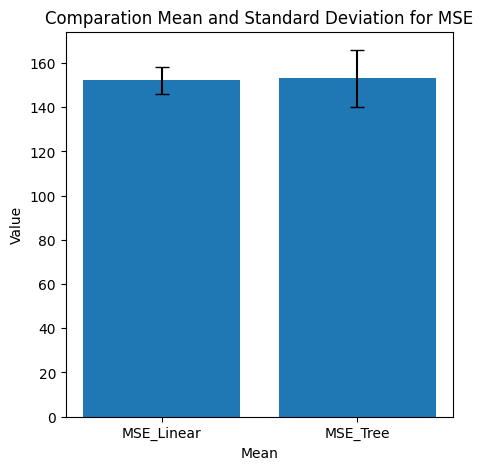

In [ ]:
#ploting graphic bar for MSE Linear and Tree
import matplotlib.pyplot as plt

Avaliations = ['MSE_Linear', 'MSE_Tree']

Mean = [np.mean(MSE_linear), np.mean(MSE_tree)]
Scores = [np.std(MSE_linear), np.std(MSE_tree)]

plt.figure(figsize=(5, 5))
plt.bar(Avaliations, Mean, yerr=Scores, capsize=5)
plt.title('Comparation Mean and Standard Deviation for MSE')
plt.xlabel('Mean')
plt.ylabel('Value')
plt.show()

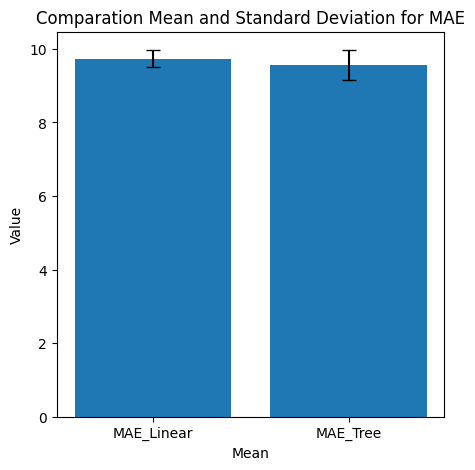

In [ ]:
#ploting graphic bar for MAE Linear and Tree
import matplotlib.pyplot as plt

Avaliations = ['MAE_Linear', 'MAE_Tree']

Mean = [np.mean(MAE_linear), np.mean(MAE_tree)]
Scores = [np.std(MAE_linear), np.std(MAE_tree)]

plt.figure(figsize=(5, 5))
plt.bar(Avaliations, Mean, yerr=Scores, capsize=5)
plt.title('Comparation Mean and Standard Deviation for MAE')
plt.xlabel('Mean')
plt.ylabel('Value')
plt.show()

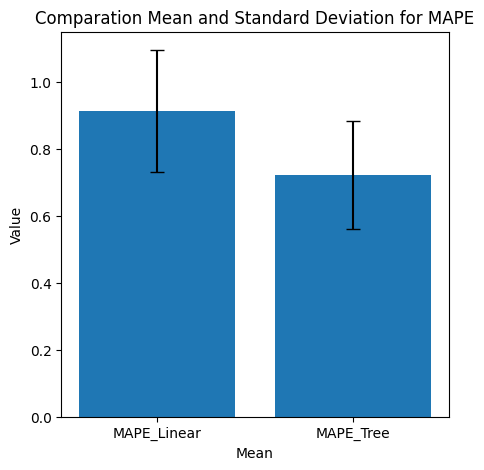

In [ ]:
#ploting graphic bar for MAPE Linear and Tree
import matplotlib.pyplot as plt

Avaliations = ['MAPE_Linear', 'MAPE_Tree']

Mean = [np.mean(MAPE_linear), np.mean(MAPE_tree)]
Scores = [np.std(MAPE_linear), np.std(MAPE_tree)]

plt.figure(figsize=(5, 5))
plt.bar(Avaliations, Mean, yerr=Scores, capsize=5)
plt.title('Comparation Mean and Standard Deviation for MAPE')
plt.xlabel('Mean')
plt.ylabel('Value')
plt.show()